In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
advertising_data = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Displaying information about the dataset
advertising_data_info = advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Checking for missing values in the dataset
missing_values = advertising_data.isnull().sum() * 100 / advertising_data.shape[0]

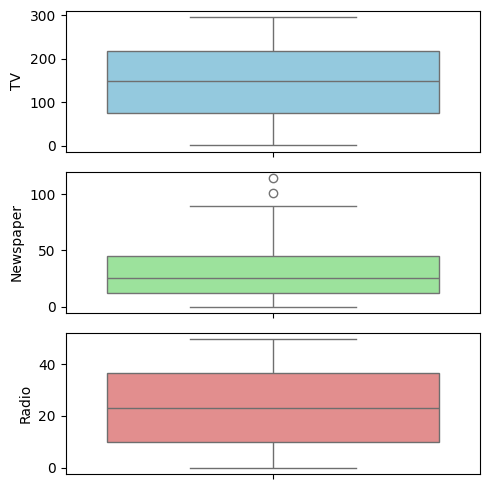

In [5]:
# Exploratory Data Analysis (EDA)

# Visualizing outliers using boxplots
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(advertising_data['TV'], ax=axs[0], color='skyblue')
plt2 = sns.boxplot(advertising_data['Newspaper'], ax=axs[1], color='lightgreen')
plt3 = sns.boxplot(advertising_data['Radio'], ax=axs[2], color='lightcoral')
plt.tight_layout()

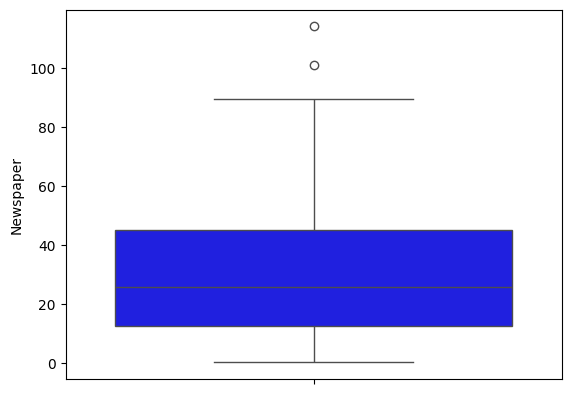

In [6]:
# Visualizing the distribution of the target variable
sns.boxplot(advertising_data['Newspaper'], color='Blue')
plt.show()

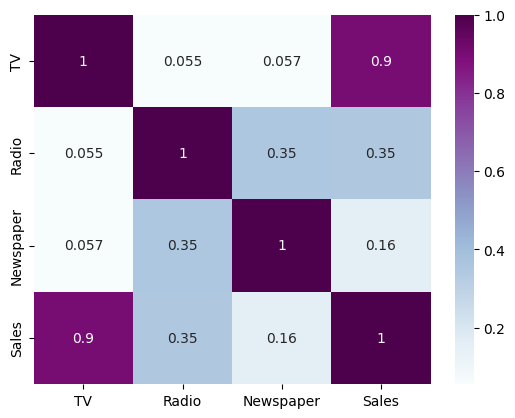

In [7]:
# Visualizing correlation matrix
correlation_heatmap = sns.heatmap(advertising_data.corr(), cmap="BuPu", annot=True)
plt.show()

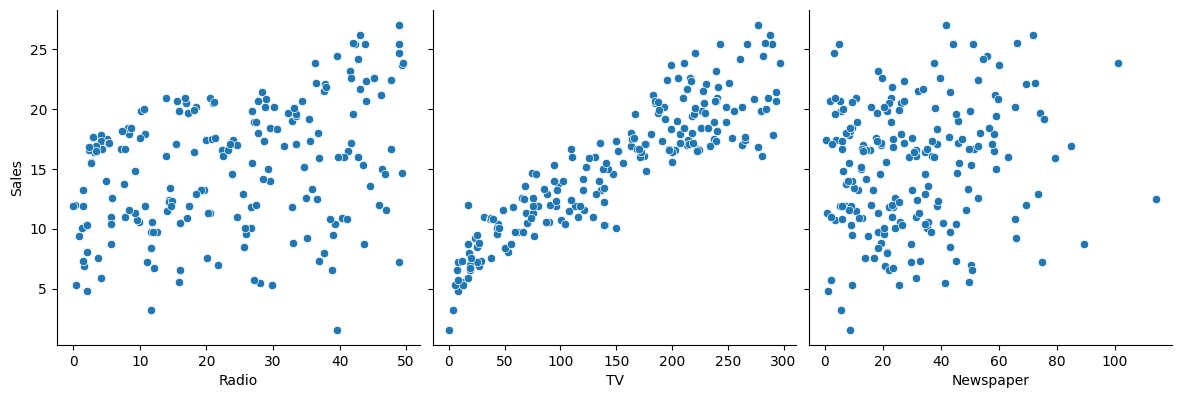

In [8]:
# Exploring relationships between variables using pair plots
sns.pairplot(advertising_data, x_vars=['Radio', 'TV', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [9]:
X = advertising_data['TV']
y = advertising_data['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [11]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

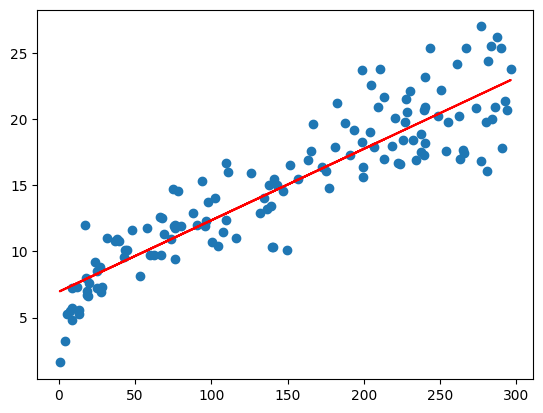

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [15]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/tmp/ipykernel_8749/4285482234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


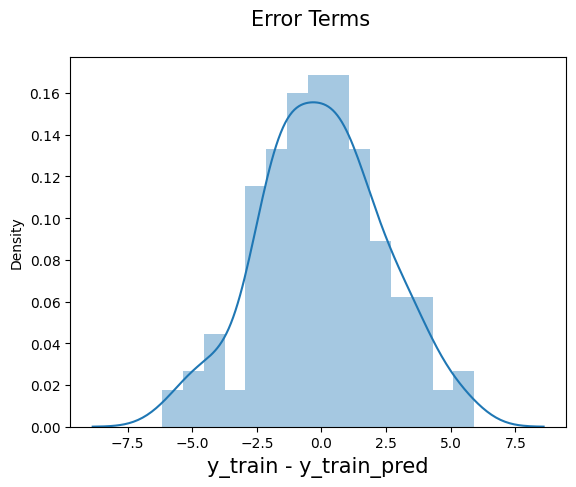

In [17]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()